### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import display, HTML

%matplotlib inline

<!--  -->

### Sample Documents Data

In [4]:
documents = [
    "NLP is branch of AI", # Doc1
    "ML is branch of AI", # Doc2
    "Dogs are loyal animals", # Doc3
    "Cats are independent animals" # Doc4
]

<!--  -->

### Cosine Similarity : To find documents similarity

- **Based on [``CountVectorizer``]**

In [5]:
# Preprocess --> documents (remove stop words, stemming etc.)
vectorizer = CountVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

# Get feature names (words in the vocabulary)
feature_names = vectorizer.get_feature_names_out()
print(f"feature_names --> {feature_names}")

# Document term frequencies (word counts)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
tfidf_df.rename(index={0: 'doc0', 1: 'doc1', 2: 'doc2', 3: 'doc3'}, inplace=True)
display(HTML(tfidf_df.to_html()))

# Calculate cosine similarity between all documents
cosine_similarities = cosine_similarity(tfidf_matrix)
print("Cosine similarity between documents")
print("--"*20)
display(cosine_similarities)


feature_names --> ['ai' 'animals' 'are' 'branch' 'cats' 'dogs' 'independent' 'is' 'loyal'
 'ml' 'nlp' 'of']


,ai,animals,are,branch,cats,dogs,independent,is,loyal,ml,nlp,of
doc0,1,0,0,1,0,0,0,1,0,0,1,1
doc1,1,0,0,1,0,0,0,1,0,1,0,1
doc2,0,1,1,0,0,1,0,0,1,0,0,0
doc3,0,1,1,0,1,0,1,0,0,0,0,0


Cosine similarity between documents
----------------------------------------


array([[1. , 0.8, 0. , 0. ],
       [0.8, 1. , 0. , 0. ],
       [0. , 0. , 1. , 0.5],
       [0. , 0. , 0.5, 1. ]])

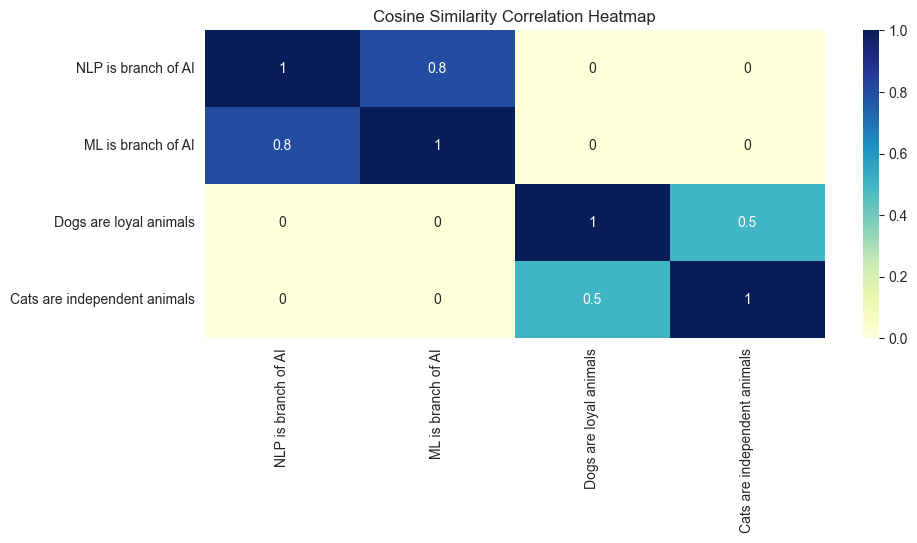

In [6]:
# Create a DataFrame from the cosine similarity matrix
cosine_df = pd.DataFrame(cosine_similarities, columns=documents, index=documents)

# Create a heatmap to visualize the correlations
sns.set_style("dark")
fig, ax = plt.subplots(figsize=(10,4))
sns.heatmap(cosine_df, annot=True, cmap="YlGnBu", ax=ax)
plt.title("Cosine Similarity Correlation Heatmap")
plt.show()

- **Based on [``TfidfVectorizer``]**

In [7]:
# Preprocess --> documents (remove stop words, stemming etc.)
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

# Get feature names (words in the vocabulary)
feature_names = vectorizer.get_feature_names_out()
print(f"feature_names --> {feature_names}")

# Document term frequencies (word counts)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
tfidf_df.rename(index={0: 'doc1', 1: 'doc2', 2: 'doc3', 3: 'doc4', 4: 'doc5'}, inplace=True)
display(HTML(tfidf_df.to_html()))

# Calculate cosine similarity between all documents
cosine_similarities = cosine_similarity(tfidf_matrix)
print("Cosine similarity between documents")
print("--"*20)
display(cosine_similarities)

feature_names --> ['ai' 'animals' 'are' 'branch' 'cats' 'dogs' 'independent' 'is' 'loyal'
 'ml' 'nlp' 'of']


,ai,animals,are,branch,cats,dogs,independent,is,loyal,ml,nlp,of
doc1,0.422247,0.000000,0.000000,0.422247,0.000000,0.000000,0.000000,0.422247,0.000000,0.000000,0.535566,0.422247
doc2,0.422247,0.000000,0.000000,0.422247,0.000000,0.000000,0.000000,0.422247,0.000000,0.535566,0.000000,0.422247
doc3,0.000000,0.437791,0.437791,0.000000,0.000000,0.555283,0.000000,0.000000,0.555283,0.000000,0.000000,0.000000
doc4,0.000000,0.437791,0.437791,0.000000,0.555283,0.000000,0.555283,0.000000,0.000000,0.000000,0.000000,0.000000


Cosine similarity between documents
----------------------------------------


array([[1.        , 0.71316877, 0.        , 0.        ],
       [0.71316877, 1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.38332232],
       [0.        , 0.        , 0.38332232, 1.        ]])

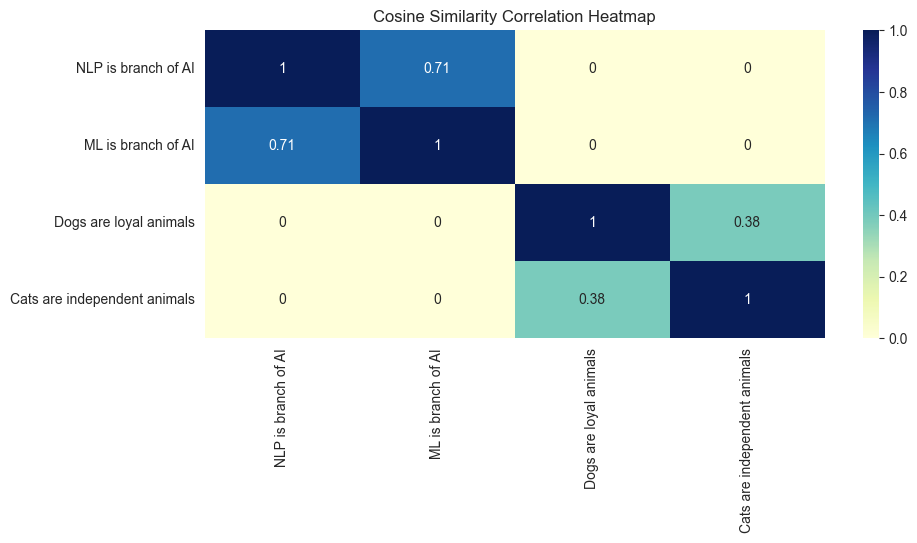

In [8]:
# Create a DataFrame from the cosine similarity matrix
cosine_df = pd.DataFrame(cosine_similarities, columns=documents, index=documents)

# Create a heatmap to visualize the correlations
sns.set_style("dark")
fig, ax = plt.subplots(figsize=(10,4))
sns.heatmap(cosine_df, annot=True, cmap="YlGnBu", ax=ax)
plt.title("Cosine Similarity Correlation Heatmap")
plt.show()

Observation

- From above two plots we can identify that first two documents shares similar topic and last two documents with other theme